### Step 6 – Support Vector Machine (SVM)

1. Train an SVM model to classify the two classes.
2. Plot the **decision boundary** obtained from the SVM.
3. Compute performance metrics: accuracy, precision, recall, and F1-score.
***

### ⚙️ When to Use Support Vector Machine (SVM)

- ✅ Use it when:
  - The dataset is **small to medium-sized** and classes are **reasonably separable**.  
  - You need a **strong baseline** for both linear and **non-linear** classification (using the RBF kernel).  
  - You want a **margin-based classifier** that avoids overfitting with a limited number of samples.  

- 🚫 Avoid it when:
  - The dataset is **very large** — kernel computations scale poorly.  
  - You need **probabilistic outputs** or interpretability.  
  - The data has **many noisy features** or inconsistent scaling.
***

### 🤖 **Model Hyperparameters**

- **Preprocessing:** `StandardScaler()` — input normalization  
- `kernel = "rbf"` — radial basis function kernel (non-linear separation)  
- `C = 1.0` — regularization parameter (controls margin vs. error trade-off)  
- `gamma = "scale"` — kernel coefficient (controls boundary smoothness)  
- `random_state = 42` — ensures reproducible results 
***

In [1]:
%run 00-setup.py

In [2]:
from tasks.svm import run_svm
from ml.data import load_dataset
from ml.viz import plt_dboundary, plt_cmatrix
from sklearn.model_selection import train_test_split

In [3]:
X, y, _ = load_dataset("../data/data_bivariate_gaussian.npz")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
res = run_svm(X_train, y_train, X_test, y_test, params={"kernel":"rbf", "C":1.0, "gamma":"scale", "seed":42})

In [5]:
res["test"]["metrics"]

{'accuracy': 0.9833333333333333,
 'precision': 0.967741935483871,
 'recall': 1.0,
 'f1': 0.9836065573770492}

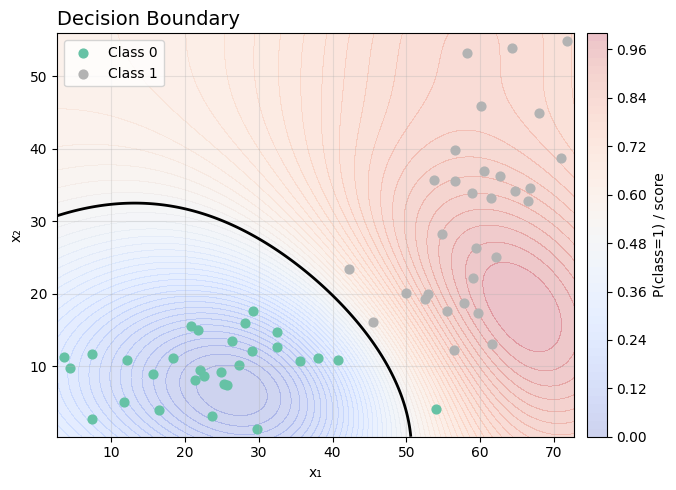

(<Figure size 700x500 with 2 Axes>,
 <Axes: title={'left': 'Decision Boundary'}, xlabel='x₁', ylabel='x₂'>)

In [6]:
plt_dboundary(res["model"], X_test, y_test)

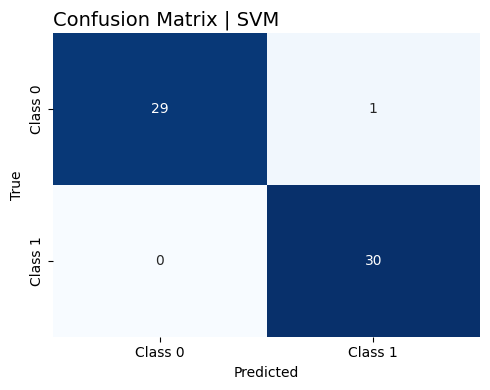

(<Figure size 500x400 with 1 Axes>,
 <Axes: title={'left': 'Confusion Matrix | SVM'}, xlabel='Predicted', ylabel='True'>)

In [7]:
plt_cmatrix(
    y_true=y_test,
    y_pred=res["test"]["y_pred"],
    title="Confusion Matrix | SVM"
)
